Missing values:
 Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64

Duplicate rows: 0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5588\3498552403.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=sales_per_region, palette='viridis')


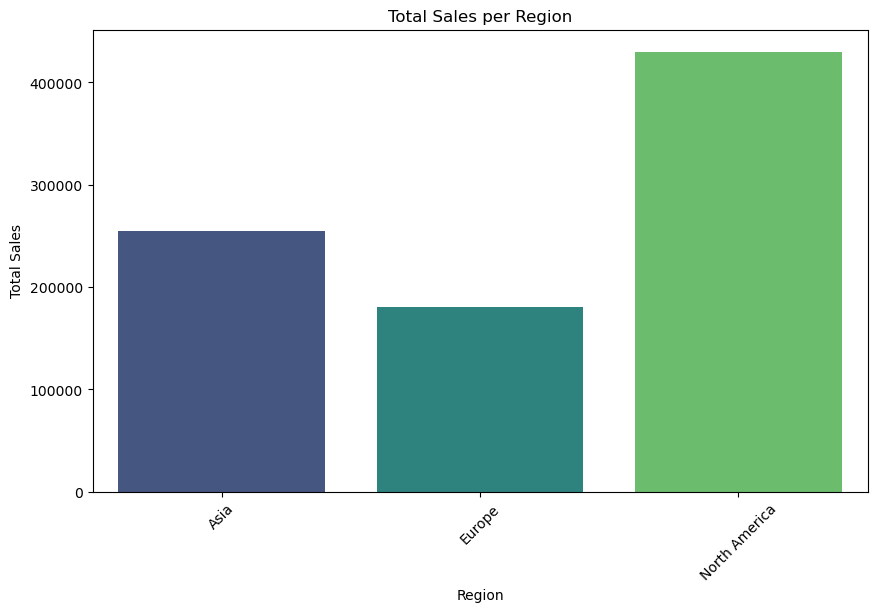

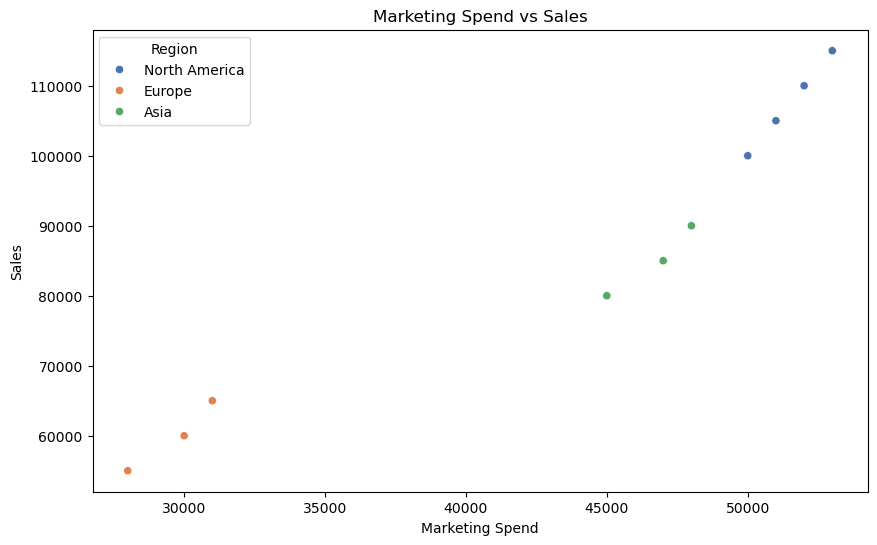

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5588\3498552403.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Effectiveness', data=data, palette='coolwarm')


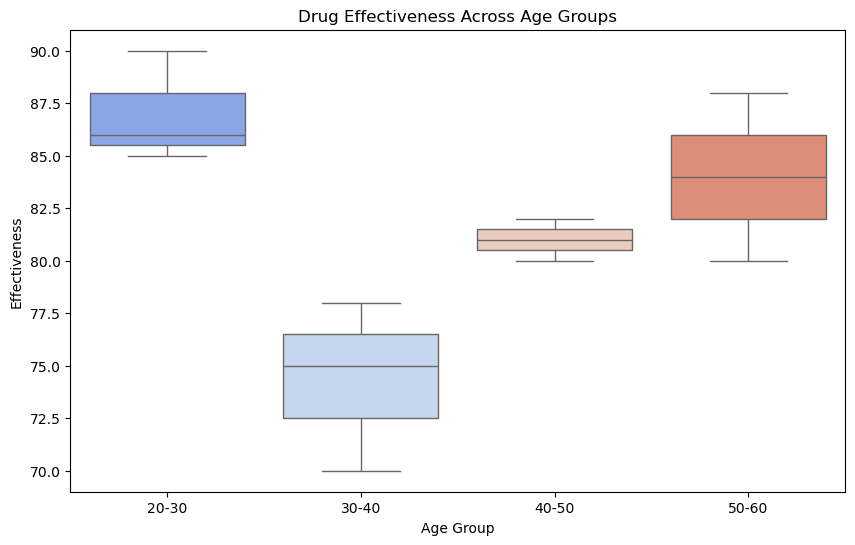

ValueError: Could not interpret value `Product` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('Day_13_Pharma_data (2).csv')

# Step 2: Data Cleaning
print("Missing values:\n", data.isnull().sum())
print("\nDuplicate rows:", data.duplicated().sum())

# Drop rows with missing values and duplicates (could be adjusted based on need)
data = data.dropna()
data = data.drop_duplicates()

# Step 3: Visualizations

# 1. Bar Plot Showing Total Sales per Region
sales_per_region = data.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=sales_per_region, palette='viridis')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

# 2. Scatter Plot to Visualize the Relationship Between Marketing_Spend and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing_Spend', y='Sales', data=data, hue='Region', palette='deep')
plt.title('Marketing Spend vs Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.show()

# 3. Boxplot Comparing Drug Effectiveness Across Different Age Groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Effectiveness', data=data, palette='coolwarm')
plt.title('Drug Effectiveness Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness')
plt.show()

# 4. Line Plot Showing the Sales Trend for Each Product Over Different Trial Periods
plt.figure(figsize=(10, 6))
sns.lineplot(x='Trial_Period', y='Sales', hue='Product', data=data)
plt.title('Sales Trend Over Different Trial Periods')
plt.xlabel('Trial Period')
plt.ylabel('Sales')
plt.legend(title='Product')
plt.show()

# 5. Heatmap of the Correlation Between Sales, Marketing_Spend, and Effectiveness
correlation_data = data[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Sales, Marketing Spend, and Effectiveness')
plt.show()

# Step 4: Summary of Patterns & Trends
# 1. Total Sales per Region
print("\nTotal Sales per Region:")
print(sales_per_region)

# 2. Correlation between Marketing Spend and Sales
marketing_sales_corr = data[['Marketing_Spend', 'Sales']].corr().iloc[0, 1]
print(f"\nCorrelation between Marketing Spend and Sales: {marketing_sales_corr:.2f}")

# 3. Effectiveness Summary by Age Group
age_effectiveness_summary = data.groupby('Age_Group')['Effectiveness'].describe()
print("\nEffectiveness Summary by Age Group:")
print(age_effectiveness_summary)

# 4. Sales Trend by Product and Trial Period
sales_trend_summary = data.groupby(['Product', 'Trial_Period'])['Sales'].sum().reset_index()
print("\nSales Trend by Product and Trial Period:")
print(sales_trend_summary)
